#Google drive

In [ ]:
GDRIVE_DIR = "/content/drive" 
GDRIVE_HOME_DIR = GDRIVE_DIR + "/MyDrive" 
GDRIVE_DATA_DIR = GDRIVE_HOME_DIR + "/ComputerVision"
DATASET_TRAIN= GDRIVE_DATA_DIR + "/dataset/train/"
DATASET_TEST= GDRIVE_DATA_DIR + "/dataset/test/"
DATASET_VALID =  GDRIVE_DATA_DIR + "/dataset/valid/"

In [ ]:
from google.colab import drive
drive.mount(GDRIVE_DIR, force_remount=True)

Mounted at /content/drive


In [ ]:
DATAYAML = "/content/drive/MyDrive/ComputerVision/yolo_dataset/data.yaml"

# Installing utilities

https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb

https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
import torch

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


#validate

In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data="/content/drive/MyDrive/ComputerVision/yolo_dataset/data.yaml"

100% 6.23M/6.23M [00:00<00:00, 110MB/s]
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 755k/755k [00:00<00:00, 31.0MB/s]
val: Scanning /content/drive/MyDrive/ComputerVision/yolo_dataset/valid/labels... 277 images, 10 backgrounds, 0 corrupt: 100% 287/287 [02:07<00:00,  2.26it/s]
val: New cache created: /content/drive/MyDrive/ComputerVision/yolo_dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:21<00:00,  1.18s/it]
                   all        287      11335      0.147     0.0384     0.0777      0.048
                person        287      10421       0.21     0.0713      0.113     0.0699
               bicycle        287        914     0.0833    0.00547     0.0425     0.0261
Speed: 2.0ms preprocess, 10.8ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/dete

#train

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model

# Use the model
results = model.train(data=DATAYAML, epochs=20)  # train the model
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ComputerVision/yolo_dataset/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/drive/MyDrive/ComputerVision/yolo_dataset/train/labels... 3876 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3876/3876 [28:26<00:00,  2.27it/s]

train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/GsEnw43RuCjCMso4C_jpg.rf.1c65f8c627aec704e4e9183f3d86e047.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/GsEnw43RuCjCMso4C_jpg.rf.b02224947a94fbd386da6e17bc0c1daf.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/GsEnw43RuCjCMso4C_jpg.rf.bff81768456d70910081b064ca0135cd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/yRwDfxM5pMFMerqfw_jpg.rf.ceb67556b8ede038d316a3da402dbfe1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/yRwDfxM5pMFMerqfw_jpg.rf.e185c007174d09bc19badfab084c4a1d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/ComputerVision/yolo_dataset/train/images/yRwDfxM5pMFMerqfw_jpg.rf.f5036c59acf20b9e147fd999d4461cda.

train: New cache created: /content/drive/MyDrive/ComputerVision/yolo_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1136, len(boxes) = 129862. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/ComputerVision/yolo_dataset/valid/labels.cache... 277 images, 10 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.53G      1.237      1.323      1.013        190        640: 100%|██████████| 243/243 [03:00<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.22it/s]

                   all        287      11335      0.672      0.637      0.634       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.18G      1.183     0.8673     0.9993        134        640: 100%|██████████| 243/243 [02:44<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        287      11335      0.693      0.625      0.652      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.32G      1.146     0.8167     0.9938        294        640: 100%|██████████| 243/243 [02:44<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        287      11335      0.722      0.624      0.657      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.51G      1.114     0.7682     0.9847        199        640: 100%|██████████| 243/243 [02:40<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

                   all        287      11335      0.681      0.664      0.672      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.64G        1.1     0.7444     0.9822        313        640: 100%|██████████| 243/243 [02:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        287      11335      0.728      0.643      0.675      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.69G      1.087      0.723     0.9803        103        640: 100%|██████████| 243/243 [02:40<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        287      11335      0.704      0.671      0.682        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.71G       1.06     0.6914     0.9692        172        640: 100%|██████████| 243/243 [02:43<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.28it/s]

                   all        287      11335      0.746      0.685      0.717      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.19G       1.05     0.6768     0.9687        177        640: 100%|██████████| 243/243 [02:38<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]

                   all        287      11335      0.772       0.68      0.728      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.79G      1.043     0.6692     0.9638        491        640: 100%|██████████| 243/243 [02:44<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        287      11335      0.778      0.697      0.743      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.79G      1.028      0.643     0.9574        196        640: 100%|██████████| 243/243 [02:42<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]

                   all        287      11335      0.781      0.698      0.734      0.559


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.14G       1.04     0.6414     0.9551        123        640: 100%|██████████| 243/243 [02:29<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        287      11335      0.751      0.699       0.73      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.29G     0.9982     0.6096     0.9426        108        640: 100%|██████████| 243/243 [02:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        287      11335      0.777      0.697      0.741      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       3.7G     0.9903     0.5985      0.939         36        640: 100%|██████████| 243/243 [02:20<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]

                   all        287      11335      0.772       0.71      0.741      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.85G     0.9784     0.5867     0.9354        346        640: 100%|██████████| 243/243 [02:17<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

                   all        287      11335       0.79       0.72      0.751       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.99G     0.9685     0.5753     0.9317         51        640: 100%|██████████| 243/243 [02:18<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        287      11335      0.787      0.717      0.751      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.36G     0.9593     0.5673      0.929         90        640: 100%|██████████| 243/243 [02:17<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        287      11335      0.778      0.724      0.756      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       4.9G     0.9441     0.5514     0.9233        201        640: 100%|██████████| 243/243 [02:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        287      11335      0.808      0.714      0.759       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.47G     0.9359     0.5469     0.9226        233        640: 100%|██████████| 243/243 [02:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        287      11335      0.779      0.745      0.764      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.74G     0.9269     0.5283     0.9203         36        640: 100%|██████████| 243/243 [02:17<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        287      11335      0.793      0.735      0.766        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.91G      0.911     0.5185     0.9138         63        640: 100%|██████████| 243/243 [02:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]

                   all        287      11335      0.803      0.724      0.765      0.601



20 epochs completed in 0.884 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:24<00:00,  2.68s/it]


                   all        287      11335      0.803      0.724      0.765      0.601
                     0        287      10421      0.826      0.683      0.727      0.525
                     1        287        914       0.78      0.765      0.804      0.678
Speed: 0.5ms preprocess, 3.1ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/ComputerVision/yolo_dataset/valid/labels.cache... 277 images, 10 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:30<00:00,  1.68s/it]


                   all        287      11335      0.803      0.724      0.766      0.603
                     0        287      10421      0.826      0.683      0.727      0.527
                     1        287        914      0.779      0.764      0.804      0.679
Speed: 0.5ms preprocess, 10.2ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from IPython.display import display, Image

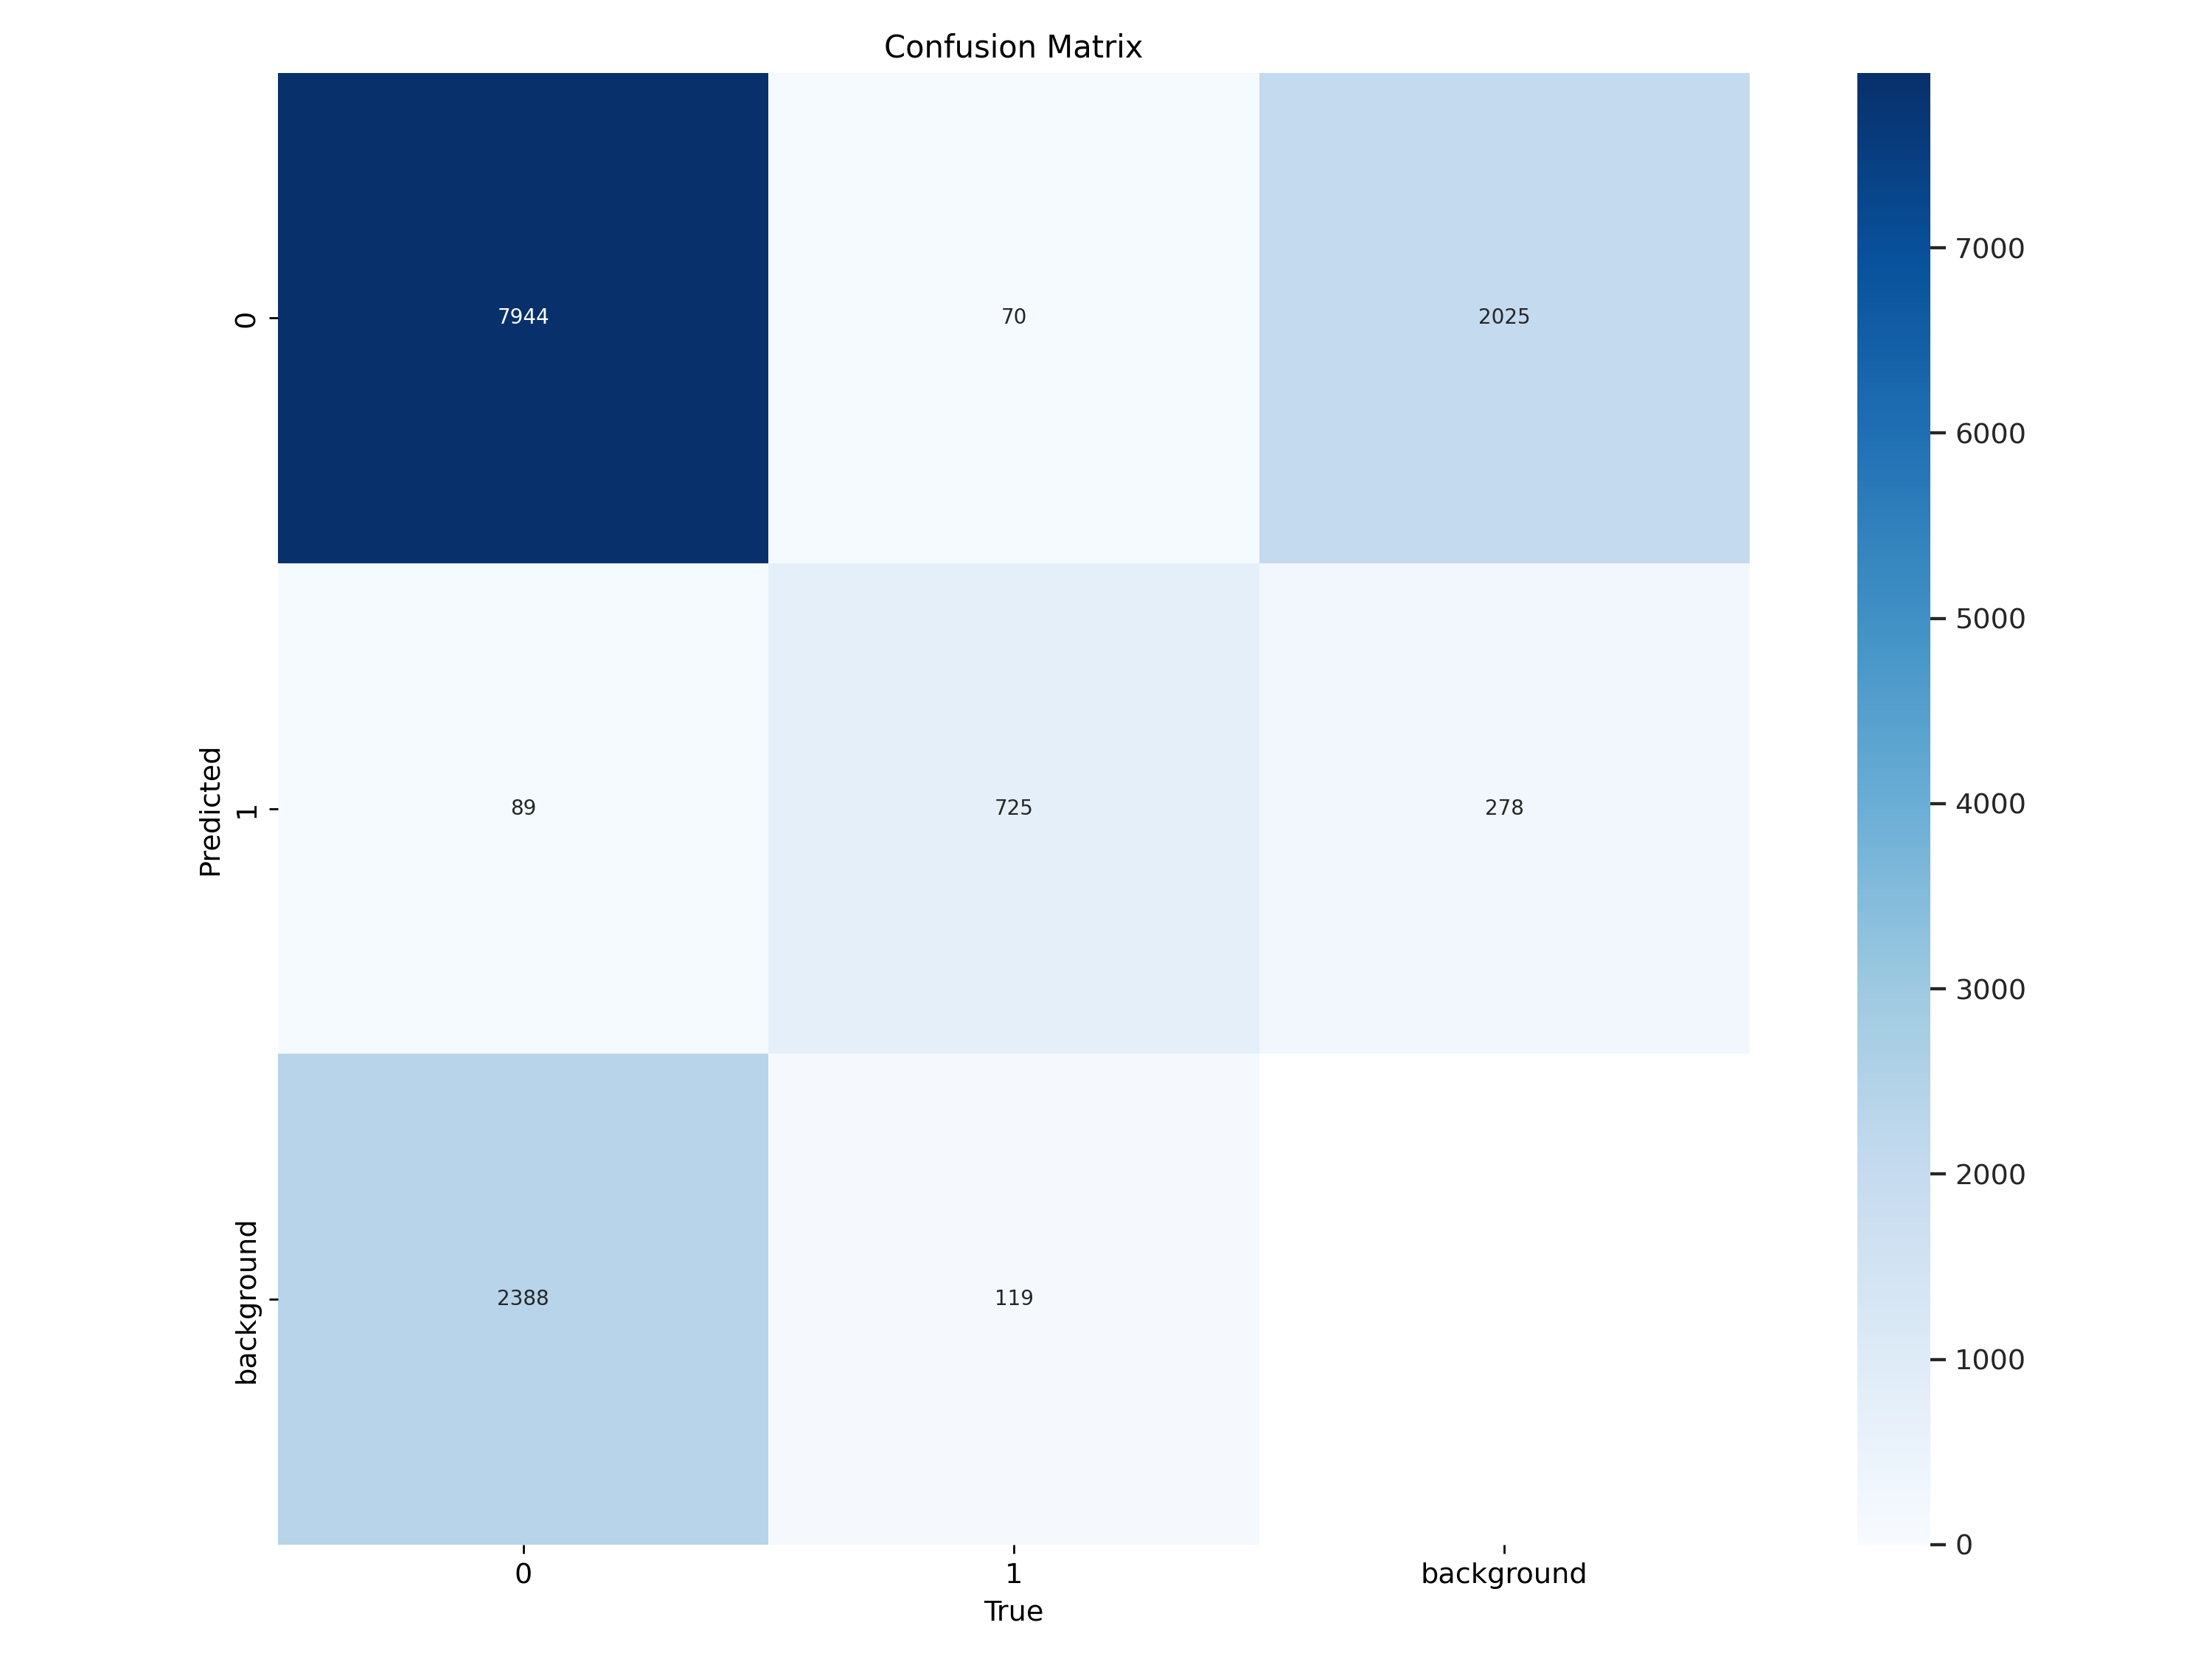

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)


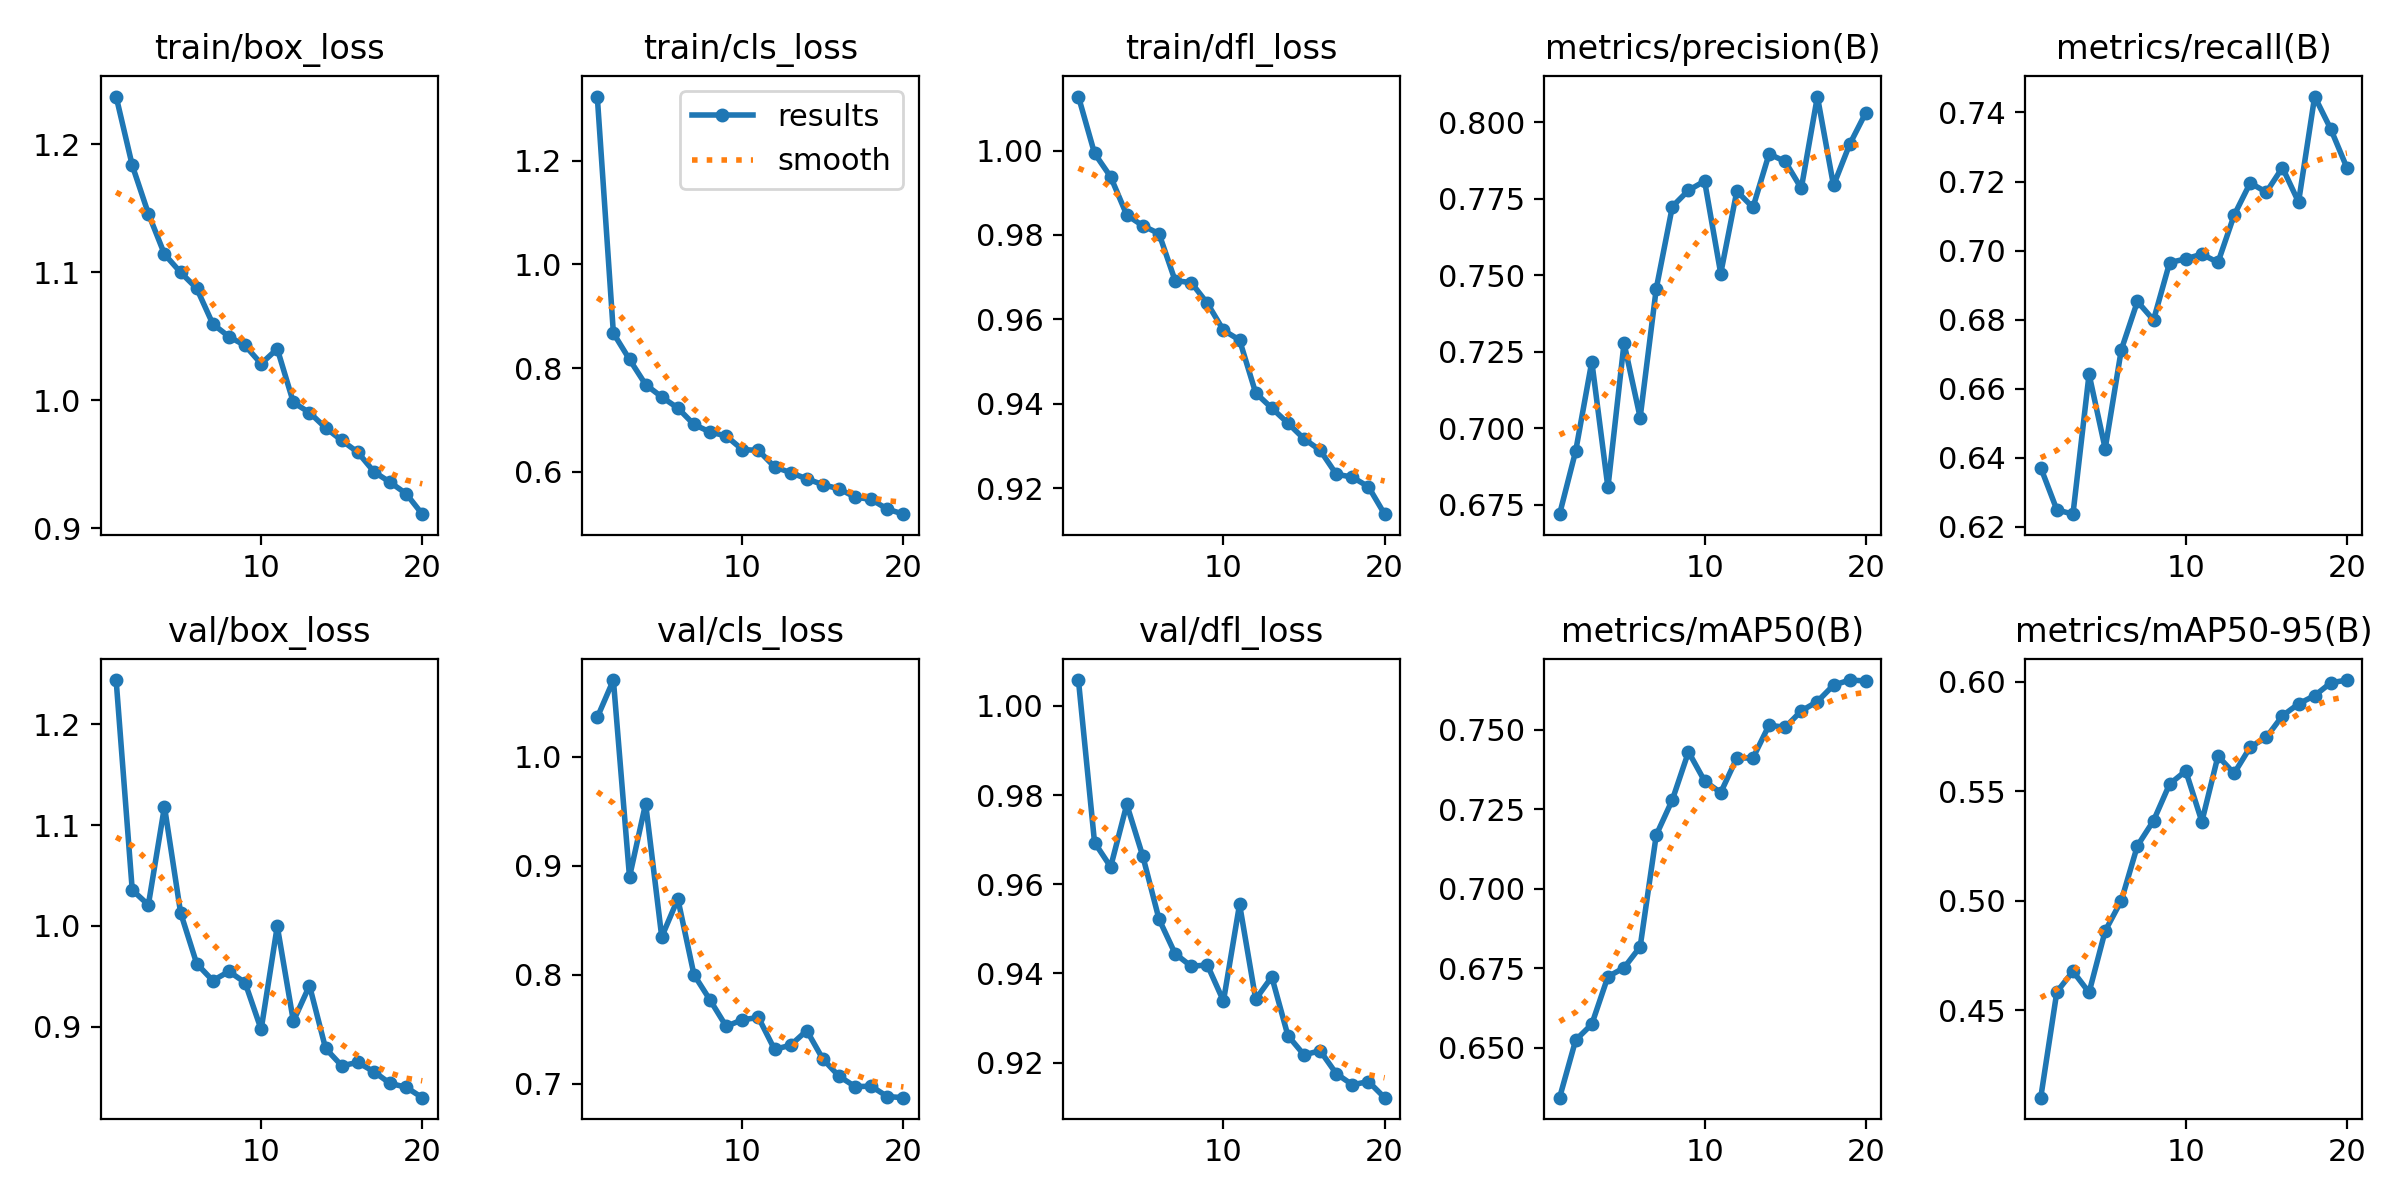

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

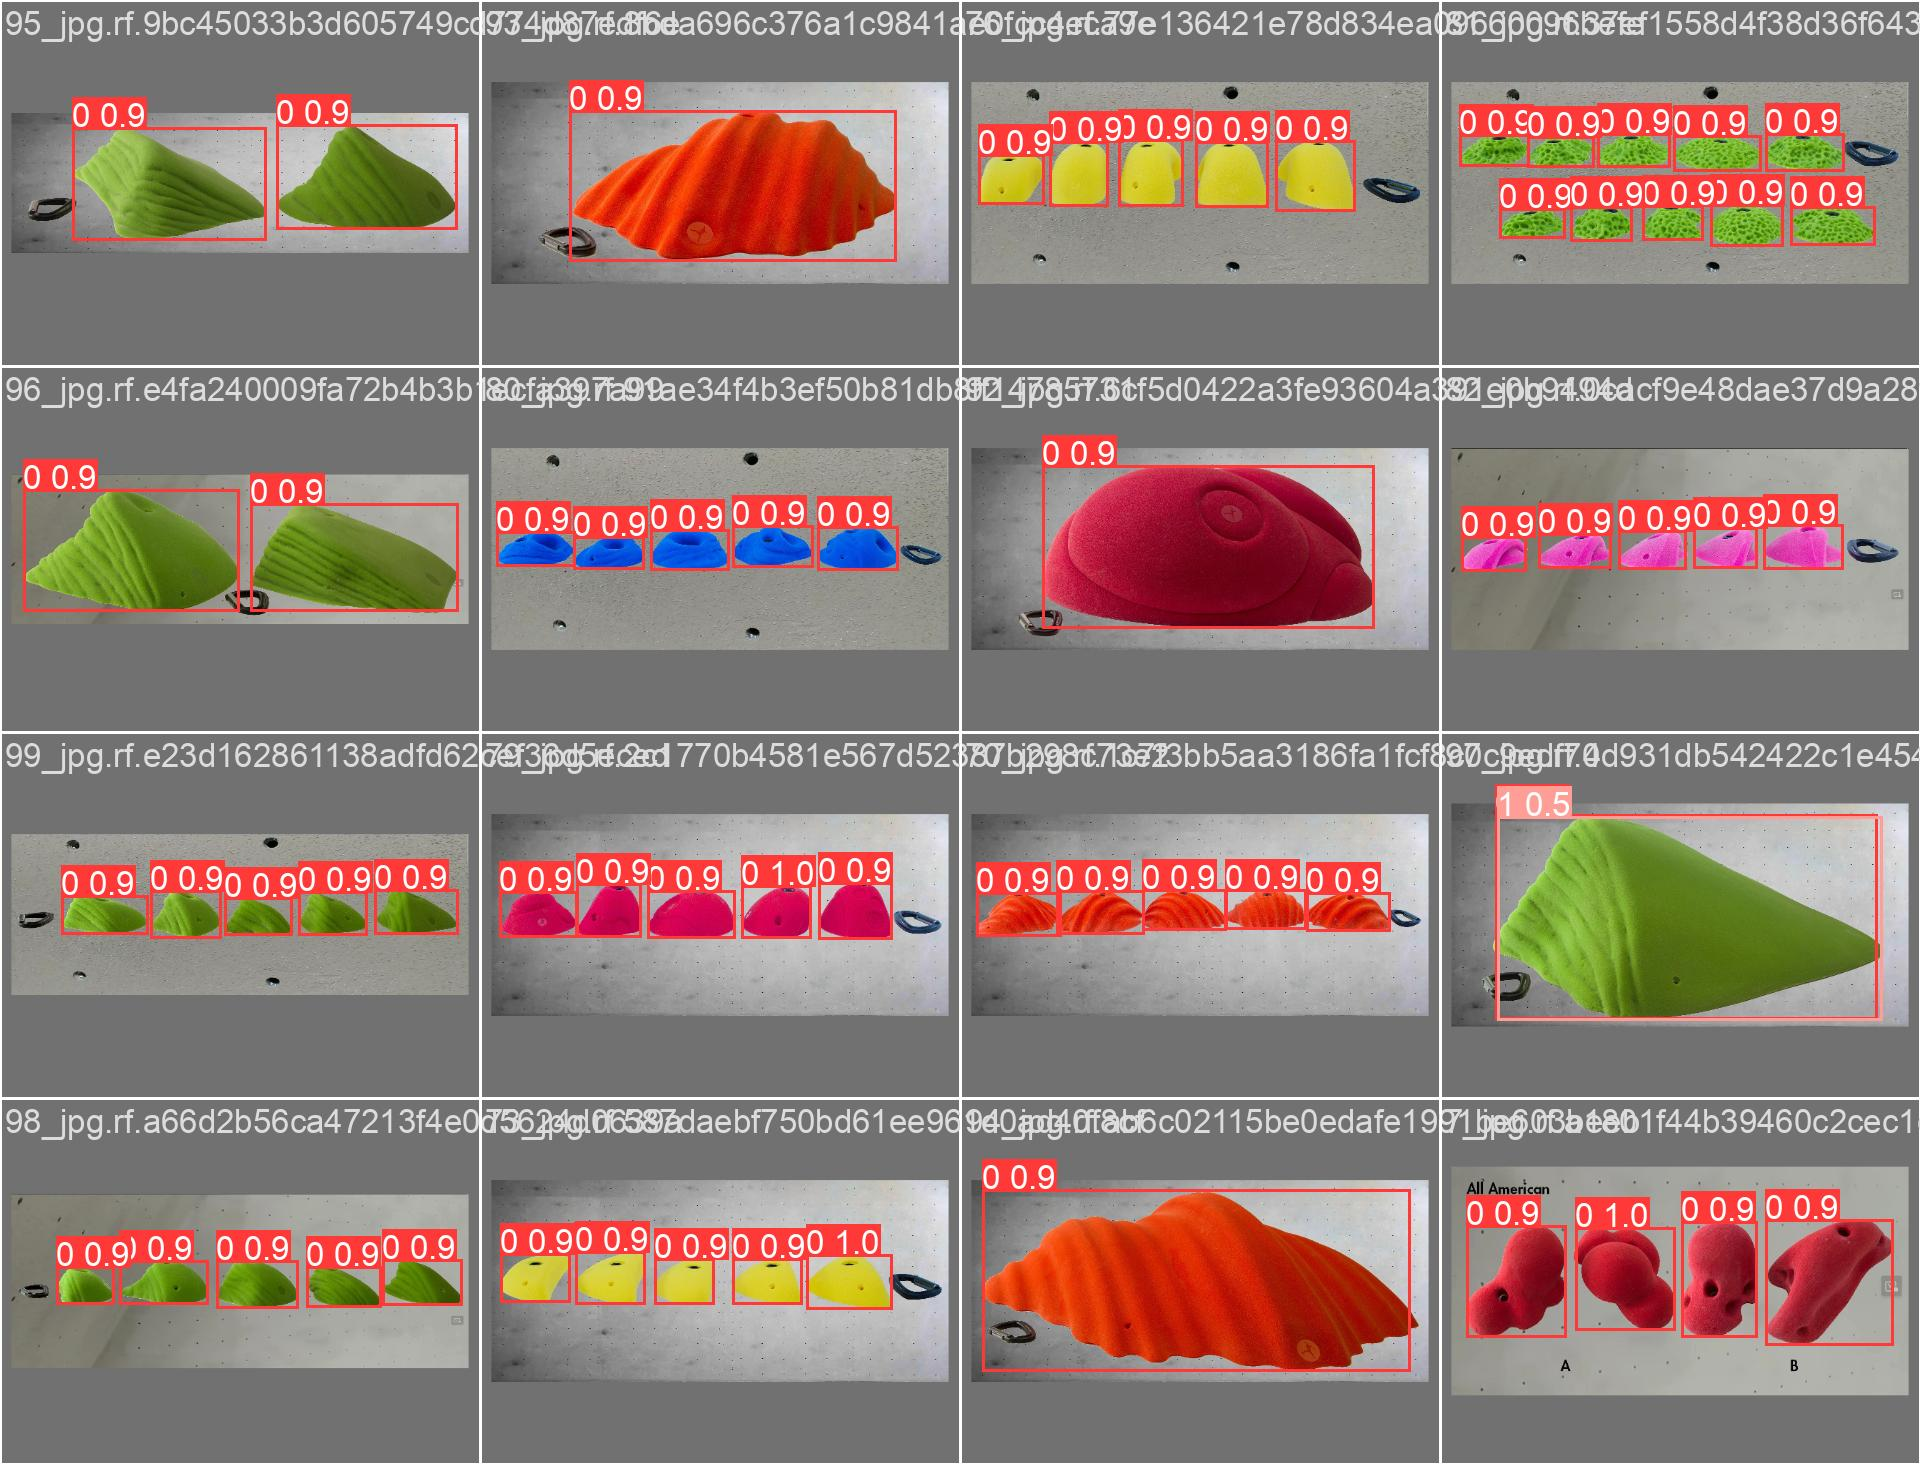

In [ ]:
Image(filename=f"/content/runs/detect/train/val_batch0_pred.jpg", width=600)

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/ComputerVision/dataset/test/6J7vRrkHmNfu9KDtP_jpg.rf.89a1196c234da8cb0c40d6e54bac66e0.jpg')

# Run the model on the image
results = model('/content/drive/MyDrive/ComputerVision/dataset/test/6J7vRrkHmNfu9KDtP_jpg.rf.89a1196c234da8cb0c40d6e54bac66e0.jpg')
print(results[0])



image 1/1 /content/drive/MyDrive/ComputerVision/dataset/test/6J7vRrkHmNfu9KDtP_jpg.rf.89a1196c234da8cb0c40d6e54bac66e0.jpg: 640x480 47 0s, 11 1s, 30.6ms
Speed: 3.4ms preprocess, 30.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '0', 1: '1'}
obb: None
orig_img: array([[[153, 167, 185],
        [154, 168, 186],
        [155, 169, 187],
        ...,
        [207, 221, 243],
        [207, 221, 243],
        [207, 221, 243]],

       [[153, 167, 185],
        [154, 168, 186],
        [155, 169, 187],
        ...,
        [207, 221, 243],
        [207, 221, 243],
        [207, 221, 243]],

       [[152, 166, 184],
        [154, 168, 186],
        [155, 169, 187],
        ...,
        [207, 221, 243],
        [207, 221, 243],
        [207, 221, 243]],

       ...,

       [[229, 235, 246],
        [218, 224, 235],
        [220